In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

In [2]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

In [3]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
newsgroups_train.target.size, newsgroups_test.target.size

(11314, 7532)

In [5]:
print(newsgroups_train.data[3])

From: jgreen@amber (Joe Green)
Subject: Re: Weitek P9000 ?
Organization: Harris Computer Systems Division
Lines: 14
Distribution: world
NNTP-Posting-Host: amber.ssd.csd.harris.com
X-Newsreader: TIN [version 1.1 PL9]

Robert J.C. Kyanko (rob@rjck.UUCP) wrote:
> abraxis@iastate.edu writes in article <abraxis.734340159@class1.iastate.edu>:
> > Anyone know about the Weitek P9000 graphics chip?
> As far as the low-level stuff goes, it looks pretty nice.  It's got this
> quadrilateral fill command that requires just the four points.

Do you have Weitek's address/phone number?  I'd like to get some information
about this chip.

--
Joe Green				Harris Corporation
jgreen@csd.harris.com			Computer Systems Division
"The only thing that really scares me is a person with no sense of humor."
						-- Jonathan Winters



In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [7]:
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

In [8]:
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [9]:
X_train.shape, y_train.shape

((11314, 130107), (11314,))

In [10]:
X_test.shape, y_test.shape

((7532, 130107), (7532,))

In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [12]:
clf.fit(X_train, y_train)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
clf.score(X_test, y_test)

0.8279341476367499

In [14]:
X_train[0]

<1x130107 sparse matrix of type '<class 'numpy.float64'>'
	with 89 stored elements in Compressed Sparse Row format>

In [15]:
X_train_0 = X_train[0].toarray()
X_train_0

array([[0., 0., 0., ..., 0., 0., 0.]])

In [16]:
np.count_nonzero(X_train_0), X_train_0.shape[1]

(89, 130107)

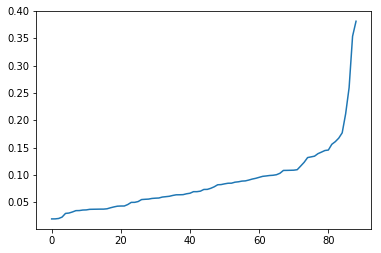

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(np.sort(X_train_0[np.nonzero(X_train_0)]))

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Binarizer

pipe = Pipeline([('bin', Binarizer()),
                 ('clf', LogisticRegression())])

In [19]:
from sklearn.model_selection import GridSearchCV

param = {'bin__threshold': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4]}

gs1 = GridSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs1.fit(X_train, y_train)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  1.4min finished
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('bin', Binarizer(copy=True, threshold=0.0)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bin__threshold': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [20]:
gs1.best_params_, gs1.best_score_, gs1.best_estimator_

({'bin__threshold': 0.05}, 0.8913735195333216, Pipeline(memory=None,
      steps=[('bin', Binarizer(copy=True, threshold=0.05)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False))]))

In [21]:
gs1.score(X_test, y_test)

0.8222251725969199

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


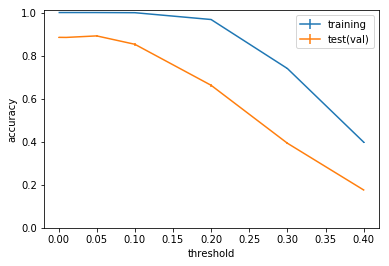

In [22]:
plt.errorbar(gs1.cv_results_['param_bin__threshold'].data,
             gs1.cv_results_['mean_train_score'],
             yerr=gs1.cv_results_['std_train_score'],
             label="training")

plt.errorbar(gs1.cv_results_['param_bin__threshold'].data,
             gs1.cv_results_['mean_test_score'],
             yerr=gs1.cv_results_['std_test_score'],
             label="test(val)")

plt.ylim(0, 1.01)
plt.xlabel("threshold")
plt.ylabel("accuracy")
plt.legend(loc="best");

In [23]:
pipe = Pipeline([('bin', Binarizer()),
                 ('clf', LogisticRegression())])

param = {'bin__threshold': [0.001, 0.01, 0.05],
         'clf__C': 10 ** np.arange(1.0, 10.0) }

from sklearn.model_selection import RandomizedSearchCV

gs11 = RandomizedSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs11.fit(X_train, y_train)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.5min finished
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('bin', Binarizer(copy=True, threshold=0.0)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'bin__threshold': [0.001, 0.01, 0.05], 'clf__C': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [24]:
gs11.best_params_, gs11.best_score_, gs11.best_estimator_

({'clf__C': 10.0, 'bin__threshold': 0.05},
 0.8917270638147428,
 Pipeline(memory=None,
      steps=[('bin', Binarizer(copy=True, threshold=0.05)), ('clf', LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False))]))

In [25]:
gs11.score(X_test, y_test)

0.8211630377057887

In [27]:
from sklearn.svm import LinearSVC

pipe = Pipeline([('bin', Binarizer()),
                 ('clf', LinearSVC())])

param = {'bin__threshold': [0.001, 0.01, 0.05],
         'clf__C': 10 ** np.arange(1.0, 10.0) }

from sklearn.model_selection import RandomizedSearchCV

gs2 = RandomizedSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs2.fit(X_train, y_train)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.4min finished
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('bin', Binarizer(copy=True, threshold=0.0)), ('clf', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'bin__threshold': [0.001, 0.01, 0.05], 'clf__C': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07, 1.e+08,
       1.e+09])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [28]:
gs2.best_params_, gs2.best_score_, gs2.best_estimator_

({'clf__C': 10000.0, 'bin__threshold': 0.05},
 0.8815626657238819,
 Pipeline(memory=None,
      steps=[('bin', Binarizer(copy=True, threshold=0.05)), ('clf', LinearSVC(C=10000.0, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='squared_hinge', max_iter=1000,
      multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
      verbose=0))]))

In [29]:
gs2.score(X_test, y_test)

0.7980616038236856

In [30]:
from sklearn.linear_model import SGDClassifier

pipe = Pipeline([('bin', Binarizer()),
                 ('clf', SGDClassifier(loss="hinge") )])

param = {'bin__threshold': [0.001, 0.01, 0.05],
         'clf__alpha': 10 ** np.arange(-10.0, -1.0) }

from sklearn.model_selection import RandomizedSearchCV

gs22 = RandomizedSearchCV(pipe, param, n_jobs=-1, verbose=2)
gs22.fit(X_train, y_train)

C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   14.3s finished
C:\Users\woobi\Anaconda3\envs\jupyter100\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=Pipeline(memory=None,
     steps=[('bin', Binarizer(copy=True, threshold=0.0)), ('clf', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_ite..._state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))]),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'bin__threshold': [0.001, 0.01, 0.05], 'clf__alpha': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [31]:
gs22.best_params_, gs22.best_score_, gs22.best_estimator_

({'clf__alpha': 0.01, 'bin__threshold': 0.001},
 0.8873077602969772,
 Pipeline(memory=None,
      steps=[('bin', Binarizer(copy=True, threshold=0.001)), ('clf', SGDClassifier(alpha=0.01, average=False, class_weight=None,
        early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
        l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
        n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
        power_t=0.5, random_state=None, shuffle=True, tol=None,
        validation_fraction=0.1, verbose=0, warm_start=False))]))

In [32]:
gs22.score(X_test, y_test)

0.8215613382899628

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = gs22.predict(X_test)

In [34]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8106    0.7649    0.7871       319
           1     0.7294    0.7069    0.7180       389
           2     0.6847    0.7716    0.7255       394
           3     0.7765    0.6735    0.7213       392
           4     0.8169    0.7766    0.7963       385
           5     0.8204    0.7519    0.7847       395
           6     0.8058    0.9256    0.8616       390
           7     0.9115    0.8586    0.8843       396
           8     0.9581    0.9196    0.9385       398
           9     0.8862    0.9219    0.9037       397
          10     0.9104    0.9674    0.9380       399
          11     0.8966    0.9192    0.9077       396
          12     0.7630    0.6718    0.7145       393
          13     0.7921    0.8561    0.8228       396
          14     0.8307    0.9213    0.8736       394
          15     0.8519    0.9397    0.8937       398
          16     0.7192    0.9148    0.8053       364
          17     0.9481    

In [35]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[244,   1,   0,   0,   1,   1,   1,   0,   0,   4,   1,   3,   1,
         10,   8,  18,   1,   2,   3,  20],
       [  3, 275,  24,  10,   9,  22,   7,   2,   3,   4,   0,   4,   7,
          2,   6,   4,   1,   1,   4,   1],
       [  1,  16, 304,  19,   8,  10,   5,   0,   0,   3,   1,   1,   3,
          5,   7,   1,   2,   1,   6,   1],
       [  1,  14,  37, 264,  19,   4,  11,   5,   0,   0,   2,   2,  23,
          3,   2,   0,   1,   0,   4,   0],
       [  0,   7,  12,  15, 299,   2,  14,   1,   0,   5,   1,   1,  15,
          6,   1,   0,   0,   2,   4,   0],
       [  1,  27,  37,   6,   2, 297,   2,   0,   1,   0,   1,   5,   0,
          2,   7,   2,   1,   2,   2,   0],
       [  0,   1,   2,   6,   3,   0, 361,   2,   0,   0,   0,   1,   8,
          3,   2,   1,   0,   0,   0,   0],
       [  0,   2,   1,   3,   1,   0,  13, 340,   6,   2,   0,   0,   9,
          7,   4,   2,   4,   0,   2,   0],
       [  0,   1,   0,   1,   2,   1,   5,  11, 366,   0,   0,  

([<matplotlib.axis.XTick at 0x2b03dbb37f0>,
 <a list of 20 Text xticklabel objects>)

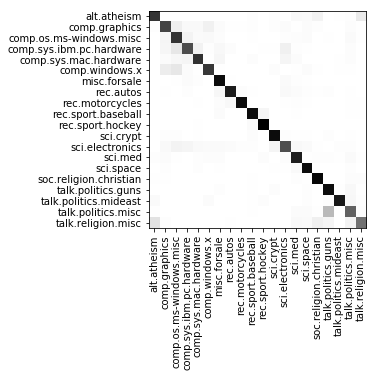

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()

plt.imshow(1- conf_mat / conf_mat.sum(axis=1),
           interpolation='nearest')

plt.yticks(range(20), newsgroups_train.target_names);
plt.xticks(range(20), newsgroups_train.target_names, rotation=90)